In [ ]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers[torch]
!pip install datasets
!pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 6.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# 데이터 불러오기

In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/Final.csv')
DF['product'] = DF['product'].replace('Money transfer, virtual currency, or money service', 'Money transfer')
DF= DF[['consumer complaint narrative','product','issue']]
DF

,consumer complaint narrative,product,issue
0,I made a purchase with XXXX to purchase a prod...,Credit card,Problem with a purchase shown on your statement
1,i asked the JC Penny store employee if there w...,Credit card,Getting a credit card
2,"Synchrony Bank, who owns the stores credit car...",Credit card,Closing your account
3,This bank doesnt value me as a customer or my ...,Credit card,"Other features, terms, or problems"
4,Purchase from XXXX on XX/XX/XXXX XXXX XXXX on ...,Credit card,Problem with a purchase shown on your statement
...,...,...,...
1326536,XX/XX/2022 Truist checking account fraudulentl...,Checking or savings account,Opening an account
1326537,We had 3 savings/investment account that were ...,Checking or savings account,Managing an account
1326538,Please refer all my complaints about Keybank. ...,Checking or savings account,Closing an account
1326539,There is a company name XXXX which provides t...,Checking or savings account,Problem with a lender or other company chargin...


In [ ]:
DF_Account = DF[DF['product'] == 'Checking or savings account']
DF_Account

,consumer complaint narrative,product,issue
1248844,I opened a savings account with Citi. I did ma...,Checking or savings account,Closing an account
1248845,In response to the unsatisfactory resolution a...,Checking or savings account,Problem caused by your funds being low
1248846,I reached out to Credit Karma about 2 months a...,Checking or savings account,Managing an account
1248847,I believe I am part of the Wells Fargo settlem...,Checking or savings account,Problem caused by your funds being low
1248848,"On Friday, XX/XX/XXXX, I went to deposit a che...",Checking or savings account,Managing an account
...,...,...,...
1326536,XX/XX/2022 Truist checking account fraudulentl...,Checking or savings account,Opening an account
1326537,We had 3 savings/investment account that were ...,Checking or savings account,Managing an account
1326538,Please refer all my complaints about Keybank. ...,Checking or savings account,Closing an account
1326539,There is a company name XXXX which provides t...,Checking or savings account,Problem with a lender or other company chargin...


In [ ]:
DF_Account['issue'].value_counts()

issue
Managing an account                                             43262
Closing an account                                              11368
Problem with a lender or other company charging your account     9624
Opening an account                                               8297
Problem caused by your funds being low                           5146
Name: count, dtype: int64

# 자연어처리

In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
data = list(DF_Account['consumer complaint narrative'])
clean = []
for narrative in (data):
 clean_narrative = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》XXXX{}]', '', narrative)
 clean.append(clean_narrative)
DF_Account['narrative'] = clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
lower = [text.lower() for text in DF_Account['narrative'].values]
DF_Account['narrative'] = lower

In [ ]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

DF_Account["narrative"]=DF_Account["narrative"].apply(lambda x: remove_stopwords(x))

DF_Account.head()

,consumer complaint narrative,product,issue,narrative
1248844,I opened a savings account with Citi. I did ma...,Checking or savings account,Closing an account,opened savings account citi make previous comp...
1248845,In response to the unsatisfactory resolution a...,Checking or savings account,Problem caused by your funds being low,response unsatisfactory resolution dismissive ...
1248846,I reached out to Credit Karma about 2 months a...,Checking or savings account,Managing an account,reached credit karma 2 months ago start proces...
1248847,I believe I am part of the Wells Fargo settlem...,Checking or savings account,Problem caused by your funds being low,believe part wells fargo settlement receive check
1248848,"On Friday, XX/XX/XXXX, I went to deposit a che...",Checking or savings account,Managing an account,friday went deposit check received mail paymen...


# 데이터 추출 및 컬럼명 변경

In [ ]:
DF_test = DF_Account[['narrative','issue']]
DF_test.columns = ['text', 'label']
DF_test

,text,label
1248844,opened savings account citi make previous comp...,Closing an account
1248845,response unsatisfactory resolution dismissive ...,Problem caused by your funds being low
1248846,reached credit karma 2 months ago start proces...,Managing an account
1248847,believe part wells fargo settlement receive check,Problem caused by your funds being low
1248848,friday went deposit check received mail paymen...,Managing an account
...,...,...
1326536,2022 truist checking account fraudulently open...,Opening an account
1326537,3 savingsinvestment account subject fraud 2023...,Managing an account
1326538,please refer complaints keybank checking savin...,Closing an account
1326539,company name provides tv services internet ser...,Problem with a lender or other company chargin...


# 데이터 분할

In [ ]:
x = DF_test
Y = DF_test['label']
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size = 0.1, stratify = Y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(69927, 2) (69927,) (7770, 2) (7770,)


In [ ]:
x_train.head()

,text,label
1289778,second complaint one issue opened business che...,Closing an account
1284378,new mortgage funded homeowners insurance premi...,Managing an account
1298166,2021 checked account noticed account joined im...,Managing an account
1316679,2022 deposited 10000000 comenity direct recent...,Managing an account
1265961,allowed people take screen walk stuff thought ...,Managing an account


In [ ]:
x_test

,text,label
1259231,several business wells fargo accounts mine cha...,Problem caused by your funds being low
1314161,received email 22 confirming opening new accou...,Opening an account
1303016,wells fargo overdraft fee started account 2009,Managing an account
1281137,deposited three checks via mobile deposit forg...,Managing an account
1299464,https received unsolicited debit card mail cha...,Opening an account
...,...,...
1289277,2018 went local td bank withdraw funds td debi...,Managing an account
1302085,sallie mae bank negligently permitted unauthor...,Managing an account
1315277,im trying set invoice system need access accep...,Managing an account
1310434,bank 53 ohio close year 2021 noticed pending w...,Managing an account


# 데이터셋 만들기




In [ ]:
import transformers
transformers.logging.set_verbosity_error()
import warnings; warnings.filterwarnings('ignore')
import os; os.environ['WANDB_DISABLED'] = 'true'
from datasets import Dataset,Features,Value,ClassLabel, DatasetDict

traindts = Dataset.from_pandas(x_train)
traindts = traindts.class_encode_column("label")
testdts = Dataset.from_pandas(x_test)
testdts = testdts.class_encode_column("label")

Casting to class labels:   0%|          | 0/69927 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/7770 [00:00<?, ? examples/s]

In [ ]:
corpus = DatasetDict({"train" : traindts ,
                      "validation" : testdts })
corpus

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 69927
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 7770
    })
})

# 토큰화

In [ ]:
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [ ]:
tokenized_corpus = corpus.map(preprocess_function, batched=True)

Map:   0%|          | 0/69927 [00:00<?, ? examples/s]

Map:   0%|          | 0/7770 [00:00<?, ? examples/s]

# 패딩

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding = True,max_length = 128)

# 성능평가 함수

In [ ]:
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
tokenized_corpus['validation'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['Closing an account', 'Managing an account', 'Opening an account', 'Problem caused by your funds being low', 'Problem with a lender or other company charging your account'], id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

# 모델

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = (AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", num_labels=5).to(device))

cuda


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

# 빠인뜌닝

In [ ]:
training_args = TrainingArguments(
    output_dir="best_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_corpus["train"],
    eval_dataset=tokenized_corpus["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()
trainer.save_model()

{'loss': 1.0836, 'grad_norm': 11.029569625854492, 'learning_rate': 1.885609700297415e-05, 'epoch': 0.11439029970258523}
{'loss': 0.8459, 'grad_norm': 10.585351943969727, 'learning_rate': 1.77121940059483e-05, 'epoch': 0.22878059940517045}
{'loss': 0.8226, 'grad_norm': 9.214183807373047, 'learning_rate': 1.6568291008922446e-05, 'epoch': 0.34317089910775567}
{'loss': 0.8089, 'grad_norm': 11.420914649963379, 'learning_rate': 1.5424388011896593e-05, 'epoch': 0.4575611988103409}
{'loss': 0.8025, 'grad_norm': 7.739701747894287, 'learning_rate': 1.428048501487074e-05, 'epoch': 0.5719514985129261}
{'loss': 0.769, 'grad_norm': 6.768404960632324, 'learning_rate': 1.3136582017844888e-05, 'epoch': 0.6863417982155113}
{'loss': 0.7708, 'grad_norm': 5.787472248077393, 'learning_rate': 1.1992679020819035e-05, 'epoch': 0.8007320979180965}
{'loss': 0.7581, 'grad_norm': 6.01071310043335, 'learning_rate': 1.0848776023793184e-05, 'epoch': 0.9151223976206818}
{'eval_loss': 0.7468516826629639, 'eval_accuracy

In [ ]:
pred_output = trainer.predict(tokenized_corpus["validation"])
pred_output

PredictionOutput(predictions=array([[-0.82455146,  1.9676783 , -1.7004174 , -0.5654604 ,  1.0105766 ],
       [ 1.0882274 ,  4.1205244 , -2.4323175 , -1.367152  , -1.0431525 ],
       [-0.5435298 ,  2.2659776 , -0.7236848 , -0.563209  , -0.59808546],
       ...,
       [ 2.1399307 ,  3.770333  , -1.4361914 , -2.6404657 , -1.4993578 ],
       [ 2.918298  ,  3.3138843 , -1.9533849 , -1.9168416 , -1.9070979 ],
       [ 0.73410904, -0.51312983,  3.0284188 , -2.551794  , -1.3898569 ]],
      dtype=float32), label_ids=array([1, 1, 4, ..., 1, 0, 2]), metrics={'test_loss': 0.7299573421478271, 'test_accuracy': 0.7055341055341056, 'test_runtime': 163.3696, 'test_samples_per_second': 47.561, 'test_steps_per_second': 2.975})

In [ ]:
print(f'Output Predition: {pred_output.predictions.shape}')
print(pred_output.predictions)

Output Predition: (7770, 5)
[[-0.82455146  1.9676783  -1.7004174  -0.5654604   1.0105766 ]
 [ 1.0882274   4.1205244  -2.4323175  -1.367152   -1.0431525 ]
 [-0.5435298   2.2659776  -0.7236848  -0.563209   -0.59808546]
 ...
 [ 2.1399307   3.770333   -1.4361914  -2.6404657  -1.4993578 ]
 [ 2.918298    3.3138843  -1.9533849  -1.9168416  -1.9070979 ]
 [ 0.73410904 -0.51312983  3.0284188  -2.551794   -1.3898569 ]]


In [ ]:
import numpy as np

# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(7770,)
Predictions: [1 1 1 ... 1 1 2]


In [ ]:
labels = tokenized_corpus["train"].features["label"].names
y_valid = np.array(tokenized_corpus["validation"]['label'])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(8,8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm.round(2).copy(), display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.tight_layout()
    plt.show()

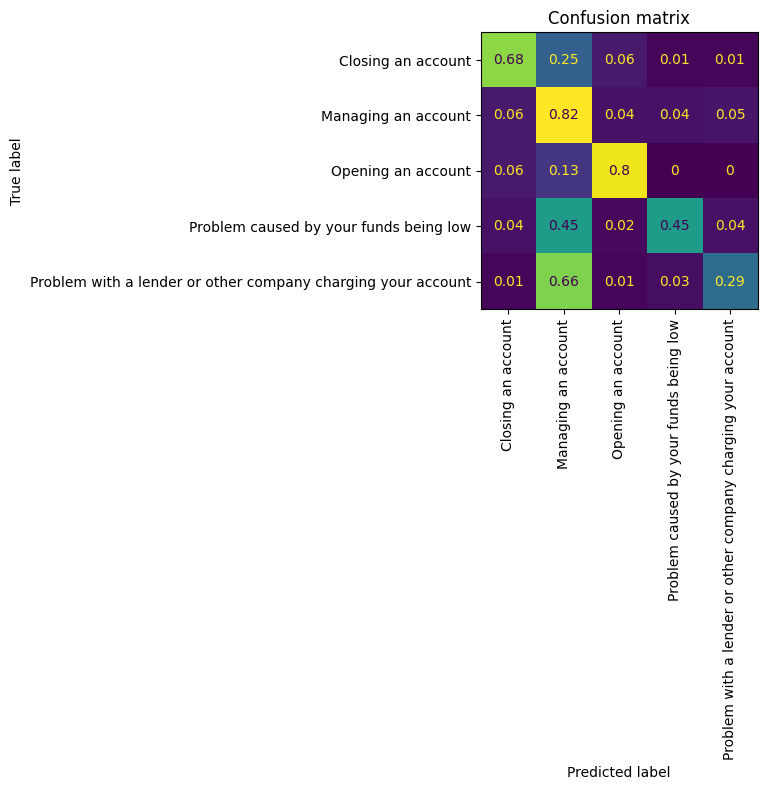

In [ ]:
plot_confusion_matrix(y_preds,y_valid,labels)

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/best_model_Checking")
#loaded_tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Credit_Card_model_trans")

# TrainingArguments
eval_args = TrainingArguments(
    output_dir="result",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

# Trainer
trainer = Trainer(
    model= model,
    args=eval_args,
    eval_dataset=tokenized_corpus["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,  # 사용자가 정의한 평가 지표 함수
)

eval_result = trainer.evaluate()

{'eval_loss': 0.6389614343643188, 'eval_accuracy': 0.738996138996139, 'eval_runtime': 164.3922, 'eval_samples_per_second': 47.265, 'eval_steps_per_second': 2.956}


In [ ]:
pred_output = trainer.predict(tokenized_corpus["validation"])

In [ ]:
y_preds = np.argmax(pred_output.predictions,axis=1)
labels = tokenized_corpus["train"].features["label"].names
y_valid = np.array(tokenized_corpus["validation"]['label'])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(8,8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm.round(2).copy(), display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.tight_layout()
    plt.show()

In [ ]:
plot_confusion_matrix(y_preds,y_valid,labels)